## 7장 선형회귀 모델

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn import datasets

boston 데이터셋의 RM feature 설명

RM: 주택당 평균 방 개수
"RM"은 보스턴 주택 데이터셋의 각 주택당 평균 방 개수를 나타냅니다. 이 특성은 주택의 크기와 공간적인 측면에 대한 정보를 제공합니다.

방의 개수는 주택의 크기와 공간의 여유를 나타내는 경향이 있습니다. 보통 방의 개수가 많을수록 주택은 더 크고 넓다는 것을 의미합니다. 따라서 방의 개수는 주택의 가격이나 가치에 영향을 줄 수 있습니다.

주택 가격을 예측하는 모델을 구축하는 경우, "RM"은 유용한 특성으로 간주될 수 있습니다. 방의 개수가 많은 주택은 일반적으로 더 높은 가격을 가지는 경향이 있기 때문입니다. 이러한 특성을 활용하여 주택 가격 예측이나 회귀 분석 작업을 수행할 수 있습니다.

보스턴 데이터셋에서 "RM" 특성은 각 서브어(동네)의 주택마다의 평균 방 개수를 나타내며, 이를 활용하여 다양한 분석과 예측 모델링 작업을 수행할 수 있습니다

In [62]:
# 학습용 데이터 준비
boston = datasets.fetch_openml(name='boston', version=1)
x_org, yt = boston.data, boston.target
feature_names = boston.feature_names
print('원본 데이터', x_org.shape, yt.shape)
print('항목 이름: ', feature_names)

# RM 데이터
x_data = np.array(x_org['RM']).reshape(-1, 1) # numpy.reshape(a, newshape, order='C')
print(f"RM 데이터 {x_data.shape}")

# 매트릭스 형태로 만들기 위해 RM(객실수) 이외의 값인 1인 더미 변수 추가
x = np.insert(x_data, 0, 1.0, axis=1) # numpy.insert(arr, obj, values, axis=None)
print(f"더미 변수 추가 후의 RM 데이터 {x.shape}")
print(f"x = {x}")

원본 데이터 (506, 13) (506,)
항목 이름:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
RM 데이터 (506, 1)
더미 변수 추가 후의 RM 데이터 (506, 2)
x = [[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]


c:\study\math4dl\math4dl\.conda\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [63]:
# 입력 데이터 x를 표시 (더미 변수 포함)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [64]:
# 정답값 yt를 표시
print(yt[:5])

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


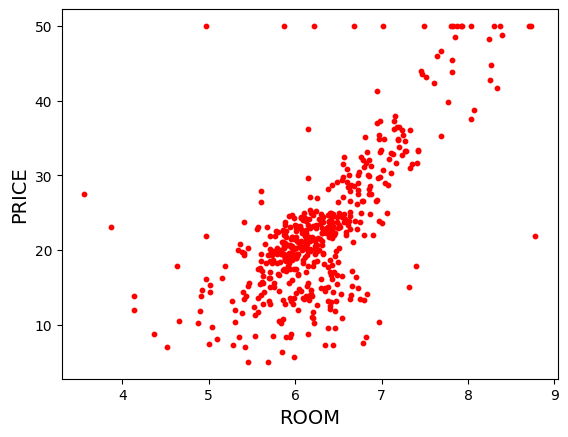

In [67]:
# 산점도를 표시
plt.scatter(x[:,1], yt, s=10, c='r')
plt.xlabel('ROOM', fontsize=14) # x(RM)
plt.ylabel('PRICE', fontsize=14) # yt(Price)
plt.show()

In [68]:
# 예측함수 (1, x)의 값에서 예측값 yp를 계산
# '@'은 내적을 의미하는 기호로 수식을 간단하게 표현할 수 있기 때문에 사용됨
def pred(x, w):
    return(x @ w)

In [73]:
# 초기화 처리

# 데이터 전체 건수
M = x.shape[0]

# 입력 데이터의 차수 (더미 변수 포함)
D = x.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [74]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산
    yp = pred(x, w)
    
    # 오차 계산
    yd = yp - yt
    
    # 경사하강법 적용
    w = w - alpha * (x.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss]))) # numpy.vstack(tup, *, dtype=None, casting='same_kind')
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 154.224934
iter = 100 loss = 29.617518
iter = 200 loss = 29.431766
iter = 300 loss = 29.250428
iter = 400 loss = 29.073399
iter = 500 loss = 28.900577
iter = 600 loss = 28.731861
iter = 700 loss = 28.567154
iter = 800 loss = 28.406360
iter = 900 loss = 28.249388
iter = 1000 loss = 28.096145
iter = 1100 loss = 27.946544
iter = 1200 loss = 27.800498
iter = 1300 loss = 27.657922
iter = 1400 loss = 27.518733
iter = 1500 loss = 27.382852
iter = 1600 loss = 27.250200
iter = 1700 loss = 27.120700
iter = 1800 loss = 26.994277
iter = 1900 loss = 26.870858
iter = 2000 loss = 26.750372
iter = 2100 loss = 26.632749
iter = 2200 loss = 26.517921
iter = 2300 loss = 26.405821
iter = 2400 loss = 26.296385
iter = 2500 loss = 26.189549
iter = 2600 loss = 26.085252
iter = 2700 loss = 25.983433
iter = 2800 loss = 25.884034
iter = 2900 loss = 25.786997
iter = 3000 loss = 25.692265
iter = 3100 loss = 25.599784
iter = 3200 loss = 25.509501
iter = 3300 loss = 25.421363
iter = 3400 loss = 25.335

In [75]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 154.224934
손실함수 최종값: 21.800325


In [78]:
# 다음 직선을 그리기 위한 좌푯값 계산
xall = x[:,1].ravel() # numpy.ravel(a, order='C') -> Return a contiguous flattened array
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)

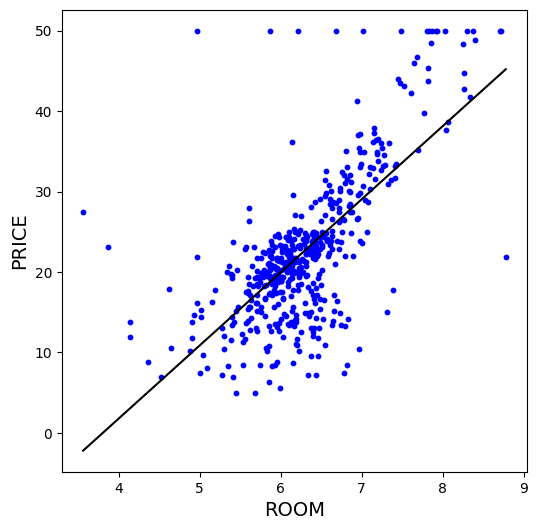

In [82]:
# 산점도와 회귀 직선 그리기
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:,1], yl, c='k')
plt.show()

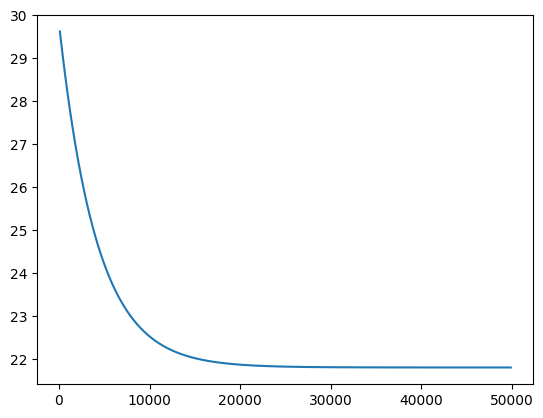

In [83]:
# 학습 곡선을 표시 (첫 1개분 제외)
plt.plot(history[1:,0], history[1:,1])
plt.show()

## 다중회귀 모델로의 확장

In [86]:
# 열(LSTAT: 저소득층 비율) 추가
x_add = np.array(x_org['LSTAT']).reshape(-1, 1)
x2 = np.hstack((x, x_add))
print(x2.shape)

(506, 3)


In [87]:
# 입력 데이터 x를 표시 (더미 데이터 포함)
print(x2[:5,:])

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 [1.    6.998 2.94 ]
 [1.    7.147 5.33 ]]


In [88]:
# 초기화 처리

# 데이터 전체 건수
M = x2.shape[0]

# 입력 데이터의 차원 수 (더미 변수 포함)
D = x2.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [89]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산
    yp = pred(x2, w)
    
    # 오차 계산
    yd = yp - yt
    
    # 경사하강법 적용
    w = w - alpha * (x2.T @ yd) / M
    
    # 학습 곡선 그리기용 데이터의 계산과 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 112.063982
iter = 100 loss = 3753823486849654538960539484160.000000
iter = 200 loss = 2655334090092048840304997303457399619333641481694889411346432.000000
iter = 300 loss = 1878297995285389845771871419740313448531353246802527452461280621621659241714209067974524928.000000
iter = 400 loss = 1328647635059328515131961917958233260010110874734494815182181913568993750919607000530712562926733207758140202205197631488.000000
iter = 500 loss = 939842635502848959802051905083333893189693285496059755389148058019690357736842983091667264575645792135994156419976659397682157829724819024732452028416.000000
iter = 600 loss = 664814474659043143721802884115979632987110146028734825208170044266817116202120531605157962210827793933144596617956699525450809534261818804738123510745485935010887781352757771894784.000000
iter = 700 loss = 470268392835468718497818789065486667296912217118110657452672825380115570246604296497646521595465470424174214614615620361523511994757143889404586660244263088322174256

C:\Users\wnsdy\AppData\Local\Temp\ipykernel_3840\2415624143.py:11: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * (x2.T @ yd) / M


iter = 2900 loss = nan
iter = 3000 loss = nan
iter = 3100 loss = nan
iter = 3200 loss = nan
iter = 3300 loss = nan
iter = 3400 loss = nan
iter = 3500 loss = nan
iter = 3600 loss = nan
iter = 3700 loss = nan
iter = 3800 loss = nan
iter = 3900 loss = nan
iter = 4000 loss = nan
iter = 4100 loss = nan
iter = 4200 loss = nan
iter = 4300 loss = nan
iter = 4400 loss = nan
iter = 4500 loss = nan
iter = 4600 loss = nan
iter = 4700 loss = nan
iter = 4800 loss = nan
iter = 4900 loss = nan
iter = 5000 loss = nan
iter = 5100 loss = nan
iter = 5200 loss = nan
iter = 5300 loss = nan
iter = 5400 loss = nan
iter = 5500 loss = nan
iter = 5600 loss = nan
iter = 5700 loss = nan
iter = 5800 loss = nan
iter = 5900 loss = nan
iter = 6000 loss = nan
iter = 6100 loss = nan
iter = 6200 loss = nan
iter = 6300 loss = nan
iter = 6400 loss = nan
iter = 6500 loss = nan
iter = 6600 loss = nan
iter = 6700 loss = nan
iter = 6800 loss = nan
iter = 6900 loss = nan
iter = 7000 loss = nan
iter = 7100 loss = nan
iter = 7200

In [90]:
# 초기화 처리 (매개변수를 적절한 값으로 변경)

# 데이터 전체 건수
M = x2.shape[0]

# 입력 데이터의 차원 수 (더미 변수를 포함)
D = x2.shape[1]

# 반복 횟수
#iters = 50000
iters = 2000

# 학습률
#alpha = 0.01
alpha = 0.001

# 가중치 벡터의 초깃값 (모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록 (손실함수의 값만 기록)
history = np.zeros((0,2))

In [92]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산
    yp = pred(x2, w)
    
    # 오차 계산
    yd = yp - yt
    
    # 경사하강법 적용
    w = w - alpha * (x2.T @ yd) / M
    
    # 학습 곡선 그리기용 데이터의 계산과 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 112.063982
iter = 100 loss = 25.358934
iter = 200 loss = 16.391055
iter = 300 loss = 15.403015
iter = 400 loss = 15.294135
iter = 500 loss = 15.282114
iter = 600 loss = 15.280764
iter = 700 loss = 15.280589
iter = 800 loss = 15.280544
iter = 900 loss = 15.280514
iter = 1000 loss = 15.280485
iter = 1100 loss = 15.280456
iter = 1200 loss = 15.280428
iter = 1300 loss = 15.280399
iter = 1400 loss = 15.280371
iter = 1500 loss = 15.280342
iter = 1600 loss = 15.280314
iter = 1700 loss = 15.280285
iter = 1800 loss = 15.280257
iter = 1900 loss = 15.280228


In [93]:
# 최종 손실함수 초깃값과 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 112.063982
손실함수 최종값: 15.280228


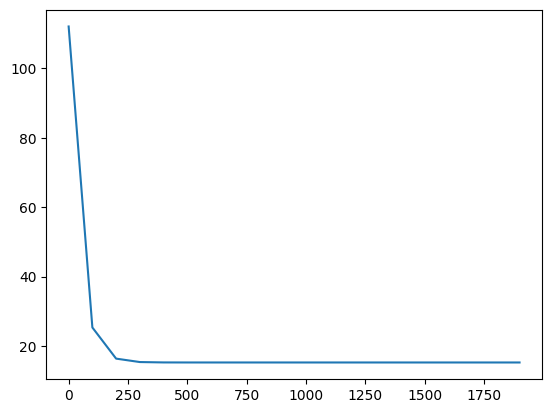

In [94]:
# 학습 곡선을 표시(처음 10개분 제외)
plt.plot(history[:,0], history[:,1])
plt.show()